# Microsoft Movie Studios 
## Industry Entrance Plan


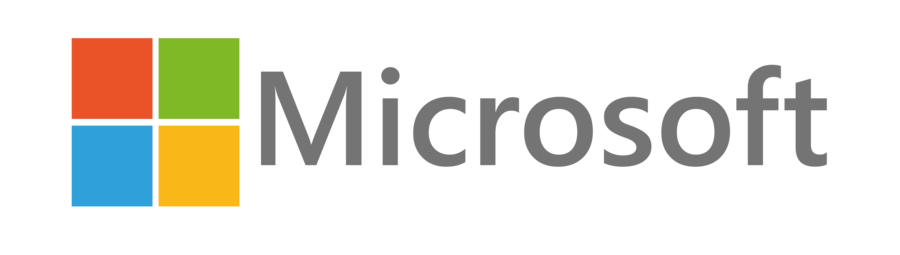

## Overview

This project takes on the movie scene to give Microsoft insightful recomendations for their first steps into the movie landscape. We recieved our data from databases such as iMDB, The Numbers, and Box Office Mojo. Our results show genres, studios, and directors Microsoft should focus on creating partnerships with. Microsoft can use our insights to create a plan to be successful in the movie industry. 



## Business Understanding

 Microsoft wants to take a dive into the movie industry. Being Microsoft, their forte is technology but not so much movie making. We were put on this project to help them get their start in the movie landscape. By looking at movie databases, we will be able to give them suggestions and help them decide what movies to make. As a business, they would focus on profits. For their consumers, they should focus on popularity. By using profit and popularity as a metric, Microsoft will know what genres, directors, and studios to work with.


## Data

We used various established movie databases. [The Numbers](https://www.the-numbers.com/about) provided geat information regarding worldwide gross, which was used to get our profitable data sets. This database had over 5.7k movies to work with. [Box Office Mojo](https://help.imdb.com/article/imdbpro/industry-research/box-office-mojo-by-imdbpro-faq/GCWTV4MQKGWRAUAP?ref_=mojo_ftr_help#) provided data on monetary values and studios for movie titles. We used this database (3.3k entries) to get the movie studios for each movie title. The [iMDB](https://help.imdb.com/article/imdb/general-information/what-is-imdb/G836CY29Z4SGNMK5?ref_=__seemr#) database was used in our popular data sets. iMDB provied much information on vote counts, directors, and genres (86k titles). By combining and cleaning data with all three databases, we were able to gather data on popular/profitable studios, genres, and directors.

## Goals
- Clean data
- Create a Popularity chart for genre, studio, directors
- Create a Profit chart for genre, studio, directors

## Cleaning data for Popularity Metric
- create a movie year column for all data sets
- makes merging easier 
- making sure there are no nulls or duplicates

In [1]:
import pandas as pd
from matplotlib.ticker import StrMethodFormatter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
imdb = pd.read_csv('imdbCSV.csv')

### Box Office Mojo Cleaning



In [3]:
bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [4]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
bom['movie year'] = bom['title'] +" "+ bom['year'].astype(str)

In [6]:
bom_clean = bom.dropna()

In [7]:
bom_clean.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
movie year        0
dtype: int64

In [8]:
bom_clean['movie year'].duplicated().sum()

0

In [9]:
bom_clean.head()

,title,studio,domestic_gross,foreign_gross,year,movie year
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3 2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland (2010) 2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows Part 1 2010
3,Inception,WB,292600000.0,535700000,2010,Inception 2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After 2010


In [10]:
bom_clean.shape

(2007, 6)

### The Numbers Cleaning

In [11]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [12]:
tn['release_date'] = pd.to_datetime(tn['release_date'], format='%b %d, %Y')

In [13]:
tn['movie year'] = tn['movie'] + ' ' + tn['release_date'].dt.year.astype(str)

In [14]:
tn.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
movie year           0
dtype: int64

In [15]:
tn = tn.drop_duplicates('movie year', keep='first')

In [16]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar 2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides 2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix 2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron 2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Star Wars Ep. VIII: The Last Jedi 2017


In [17]:
tn.shape

(5781, 7)

## Using iMDB to get popular genre dataframe
- setting up df to use for later in making graphs

In [18]:
imdb.head()

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes,movie_id.2,person_id,person_id.1,primary_name,birth_year,death_year,primary_profession
0,0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,tt1375666,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
1,1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769,tt1345836,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
2,2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334,tt0816692,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
3,3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405,tt1853728,nm0000233,nm0000233,Quentin Tarantino,1963.0,NaN,"writer,actor,producer"
4,4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655,tt0848228,nm0923736,nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director"


In [19]:
imdb.shape

(86030, 17)

In [20]:
rel_imdb = imdb[['primary_title', 'genres', 'averagerating', 'numvotes', 'primary_name']]

In [21]:
rel_imdb.isna().sum()

primary_title      0
genres           798
averagerating      0
numvotes           0
primary_name       0
dtype: int64

In [22]:
rel_imdb = rel_imdb.dropna()

In [23]:
rel_imdb['genres'] = rel_imdb['genres'].str.split(',')

In [24]:
rel_imdb = rel_imdb.explode('genres')

#### Using this df for popular genres chart

In [25]:
rel_imdb.head()

,primary_title,genres,averagerating,numvotes,primary_name
0,Inception,Action,8.8,1841066,Christopher Nolan
0,Inception,Adventure,8.8,1841066,Christopher Nolan
0,Inception,Sci-Fi,8.8,1841066,Christopher Nolan
1,The Dark Knight Rises,Action,8.4,1387769,Christopher Nolan
1,The Dark Knight Rises,Thriller,8.4,1387769,Christopher Nolan


## Most Popular studios
- will have to merge imdb with bom to get popular studios

In [26]:
bom_clean.head()

,title,studio,domestic_gross,foreign_gross,year,movie year
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3 2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland (2010) 2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows Part 1 2010
3,Inception,WB,292600000.0,535700000,2010,Inception 2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After 2010


In [27]:
imdb.head()

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes,movie_id.2,person_id,person_id.1,primary_name,birth_year,death_year,primary_profession
0,0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,tt1375666,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
1,1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769,tt1345836,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
2,2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334,tt0816692,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
3,3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405,tt1853728,nm0000233,nm0000233,Quentin Tarantino,1963.0,NaN,"writer,actor,producer"
4,4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655,tt0848228,nm0923736,nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director"


In [28]:
relevant_col = imdb[['primary_title', 'start_year', 'numvotes', 'averagerating']]

In [29]:
relevant_col['movie year'] = relevant_col['primary_title'] + " " + relevant_col['start_year'].astype(str)

<ipython-input-29-c54208553c70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_col['movie year'] = relevant_col['primary_title'] + " " + relevant_col['start_year'].astype(str)


In [30]:
bom_imdb = bom.merge(relevant_col, on='movie year')

In [31]:
bom_imdb.shape

(2078, 10)

In [32]:
bom_imdb.drop_duplicates('movie year', keep='first').shape

(1822, 10)

- we will lose aorund 12% of data, we will still have 1822 movies to gather data from
- we think this is fine, its enough movies to get reliable data

In [33]:
bom_imdb = bom_imdb.sort_values('numvotes', ascending=False)

In [34]:
bom_imdb_clean = bom_imdb.drop_duplicates('movie year', keep='first')

In [35]:
bom_imdb_clean['studio'].replace({'FoxS': 'Fox', 'BV': 'BV (Disney)', 'SPC': 'Sony', 'WB (NL)' : 'WB'}, inplace=True)

C:\Users\dcv_2\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [36]:
pop_studios = bom_imdb_clean.groupby('studio')['numvotes'].mean().sort_values()[::-1]

#### Using this series for popular studios chart

In [37]:
pop_studios.head()

studio
BV (Disney)    229164.783133
P/DW           213462.000000
Par.           196643.320513
WB             195390.608392
Wein.          166325.000000
Name: numvotes, dtype: float64

# Using Seaborn to Make Graphs

In [38]:
studios = ['Disney', 'DreamWorks', 'Paramount', 'Warner B.', 'Weinstein', 'Lionsgate', 'Neon', 'Universal', 'Summit Ent.', 'Fox']


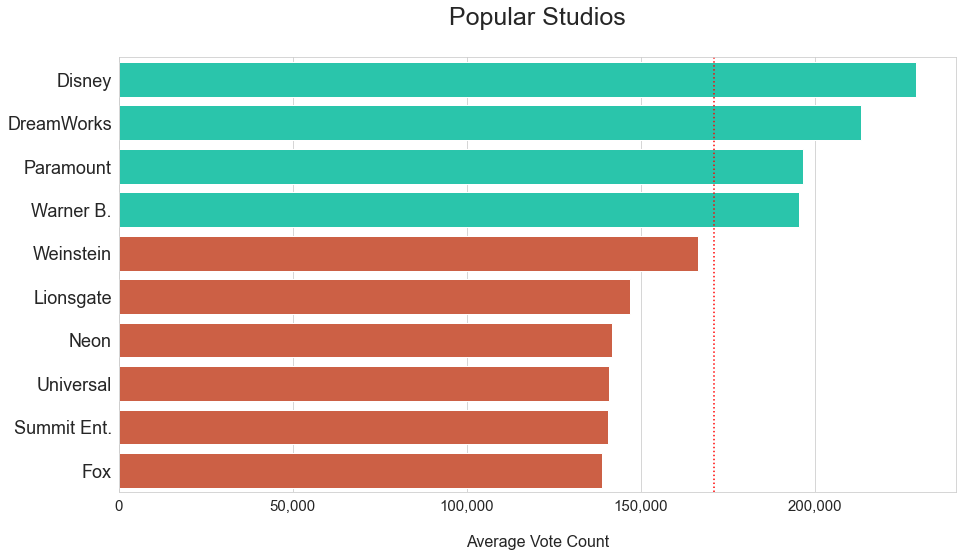

In [39]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')

pop_mean = pop_studios.values[:10].mean()

col = np.where(pop_studios.values[:10] > pop_mean, '#10DFBC', '#E2522F')

ax4 = sns.barplot(y=studios, 
                      x=pop_studios.values[:10], 
                      orient='h', 
                      palette = col)
ax4.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
#palette=sns.blend_palette(['#76BA1B', '#1E5631'], 10)
plt.title('Popular Studios\n', fontsize = 25)
plt.ylabel('')
plt.xlabel('\nAverage Vote Count', fontsize = 16)
plt.yticks(fontsize=18)
plt.xticks(fontsize=15)
plt.axvline(pop_mean, color='red', ls='dotted');

In [40]:
gen_vs_pop = rel_imdb.groupby('genres')['numvotes'].mean().sort_values()[::-1]
genre = gen_vs_pop.index
genre_values = gen_vs_pop.values

In [41]:
!ls


README.md
final_notebook.ipynb
imdbCSV.csv
movie_info
photos
popular_work
profit_work
zippedData


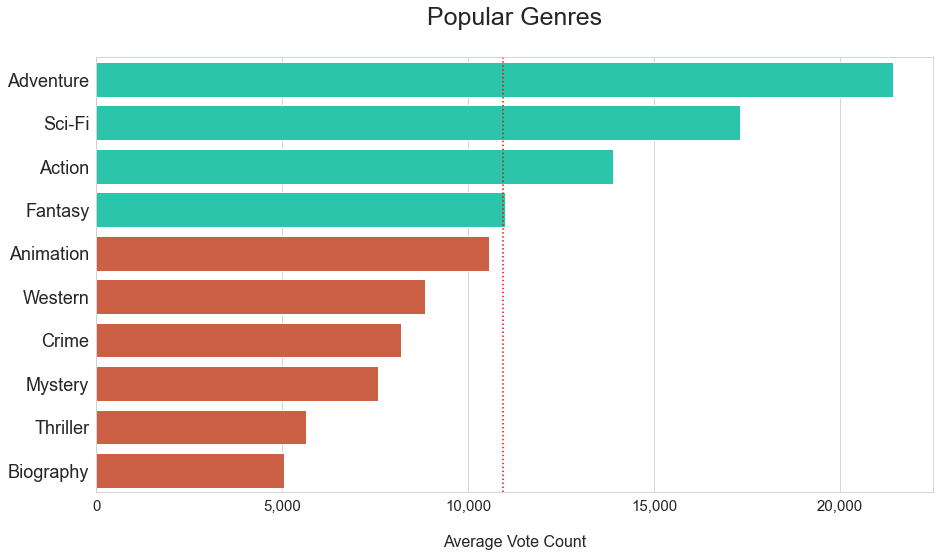

In [42]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')

gen_mean = genre_values[:10].mean()

c = np.where(genre_values[:10] > gen_mean, '#10DFBC', '#E2522F')

ax5 = sns.barplot(y=genre[:10], 
                      x=genre_values[:10], 
                      orient='h', 
                      palette=c)
ax5.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title('Popular Genres\n', fontsize = 25)
plt.ylabel('')
plt.xlabel('\nAverage Vote Count', fontsize = 16)
plt.yticks(fontsize=18)
plt.xticks(fontsize=15)
plt.axvline(gen_mean, color='red', ls='dotted')
plt.savefig('photos/popGen.png');

## Creating Popular Director Graph

In [43]:
imdb.head()

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes,movie_id.2,person_id,person_id.1,primary_name,birth_year,death_year,primary_profession
0,0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,tt1375666,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
1,1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769,tt1345836,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
2,2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334,tt0816692,nm0634240,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director"
3,3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405,tt1853728,nm0000233,nm0000233,Quentin Tarantino,1963.0,NaN,"writer,actor,producer"
4,4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655,tt0848228,nm0923736,nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director"


In [44]:
dir_df = imdb[['primary_title', 'numvotes', 'primary_name', 'start_year']]

In [45]:
dir_df['movie year'] = dir_df['primary_title'] + " " + dir_df['start_year'].astype(str)

<ipython-input-45-8c3db98230c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dir_df['movie year'] = dir_df['primary_title'] + " " + dir_df['start_year'].astype(str)


In [46]:
clean_dir_df = dir_df.sort_values(by='numvotes', ascending=False).drop_duplicates(subset=['movie year'], keep='first')


In [47]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [48]:
pop_dir = clean_dir_df.groupby('primary_name')['numvotes'].mean().sort_values()[::-1]

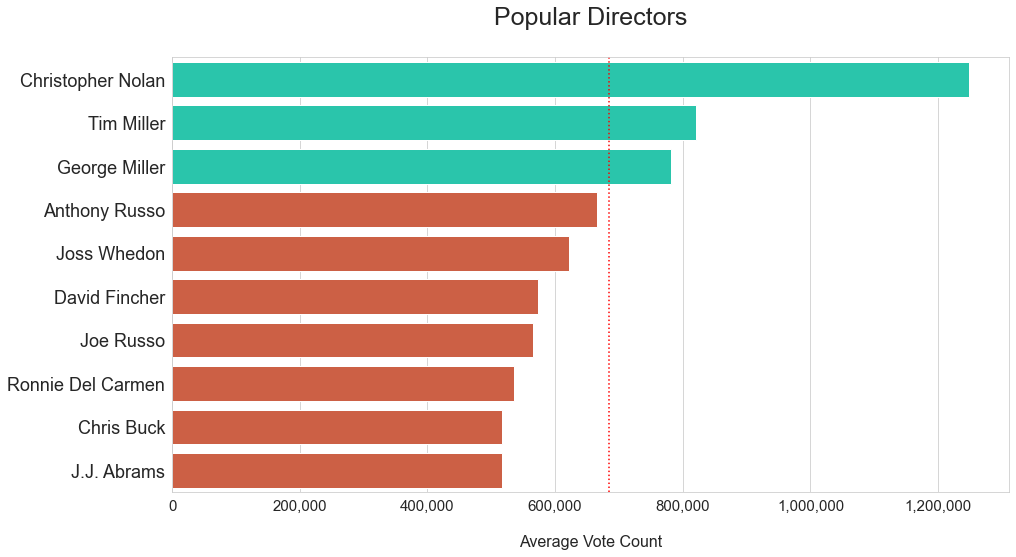

In [49]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')

dir_mean = pop_dir.values[:10].mean()

co = np.where(pop_dir.values[:10] > dir_mean, '#10DFBC', '#E2522F')

axtest = sns.barplot(y=pop_dir.index[:10], 
                      x=pop_dir.values[:10], 
                      orient='h', 
                      palette=co)
axtest.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title('Popular Directors\n', fontsize = 25)
plt.ylabel('')
plt.xlabel('\nAverage Vote Count', fontsize = 16)
plt.yticks(fontsize=18)
plt.xticks(fontsize=15)
plt.axvline(dir_mean, color='red', ls='dotted');

# Making Profit Graphs
- includes data cleaning and making the graphs themselves

## Merging and cleaning data For Profitable Directors

In [50]:
clean_dir_df.head()

,primary_title,numvotes,primary_name,start_year,movie year
0,Inception,1841066,Christopher Nolan,2010,Inception 2010
1,The Dark Knight Rises,1387769,Christopher Nolan,2012,The Dark Knight Rises 2012
2,Interstellar,1299334,Christopher Nolan,2014,Interstellar 2014
3,Django Unchained,1211405,Quentin Tarantino,2012,Django Unchained 2012
4,The Avengers,1183655,Joss Whedon,2012,The Avengers 2012


In [51]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar 2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides 2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix 2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron 2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Star Wars Ep. VIII: The Last Jedi 2017


In [52]:
tn[['production_budget', 'worldwide_gross']] = tn[['production_budget', 'worldwide_gross']].replace(r'[^.0-9]', '', regex=True).astype(float)


In [53]:
tn['ww_profit'] = tn['worldwide_gross'] - tn['production_budget']

In [54]:
tn_rel = tn[['movie', 'ww_profit', 'movie year']]

In [55]:
tn_rel.shape

(5781, 3)

In [56]:
profit_dir = clean_dir_df.merge(tn_rel, on='movie year').sort_values(by='ww_profit', ascending=False).drop_duplicates(subset=['movie year'], keep='first')


In [57]:
profit_dir.head()

,primary_title,numvotes,primary_name,start_year,movie year,movie,ww_profit
18,Avengers: Infinity War,670926,Joe Russo,2018,Avengers: Infinity War 2018,Avengers: Infinity War,1748134200.00000
45,Jurassic World,539338,Colin Trevorrow,2015,Jurassic World 2015,Jurassic World,1433854864.00000
130,Furious 7,335074,James Wan,2015,Furious 7 2015,Furious 7,1328722794.00000
4,The Avengers,1183655,Joss Whedon,2012,The Avengers 2012,The Avengers,1292935897.00000
57,Black Panther,516148,Ryan Coogler,2018,Black Panther 2018,Black Panther,1148258224.00000


In [58]:
money_dir = profit_dir.groupby('primary_name')['ww_profit'].mean().sort_values()[::-1]

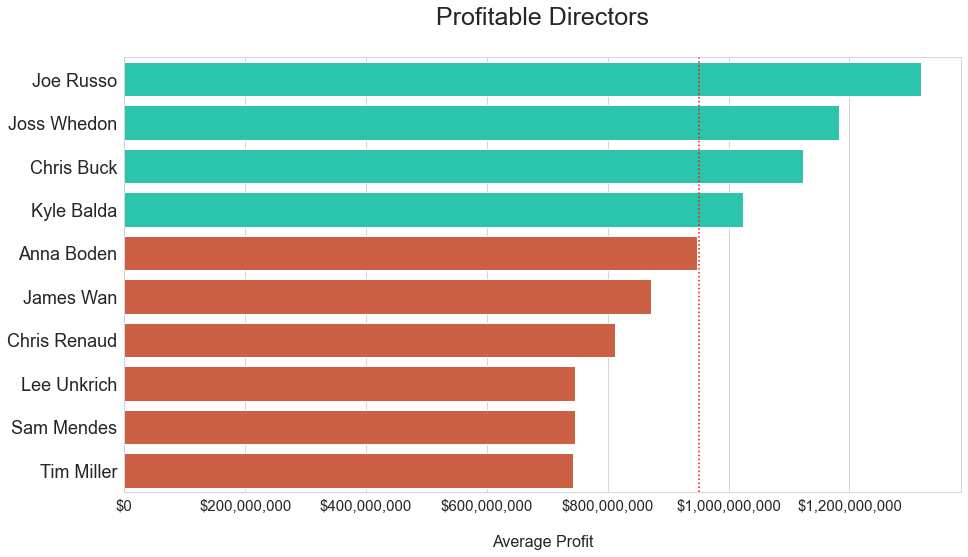

In [59]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')

money_mean = money_dir.values[:10].mean()

colur = np.where(money_dir.values[:10] > money_mean, '#10DFBC', '#E2522F')

axdir = sns.barplot(y=money_dir.index[:10], 
                      x=money_dir.values[:10], 
                      orient='h', 
                      palette=colur)
axdir.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.title('Profitable Directors\n', fontsize = 25)
plt.ylabel('')
plt.xlabel('\nAverage Profit', fontsize = 16)
plt.yticks(fontsize=18)
plt.xticks(fontsize=15)
plt.axvline(money_mean, color='red', ls='dotted')
plt.savefig('photos/proDir.png');

# Studio and Genre Profitability

Import Dataframe file

In [60]:
imdb_df = pd.read_csv('https://raw.githubusercontent.com/vimixy/Movie-Analysis-Project/main/imdbCSV.csv')

### Clean Data

Drop columns irrelevant to the focus of our data inspection. We want to find information on what makes a movie successful, in this section, specifically production studios and genre.

In [61]:
imdb_df_new = imdb_df.drop(columns = ['Unnamed: 0', 'primary_title', 'movie_id.1', 'movie_id.2', 'person_id.1', 'birth_year', 'death_year', 'primary_profession'])

In [62]:
imdb_df_new.head()

,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name
0,tt1375666,Inception,2010,148.00000,"Action,Adventure,Sci-Fi",8.80000,1841066,nm0634240,Christopher Nolan
1,tt1345836,The Dark Knight Rises,2012,164.00000,"Action,Thriller",8.40000,1387769,nm0634240,Christopher Nolan
2,tt0816692,Interstellar,2014,169.00000,"Adventure,Drama,Sci-Fi",8.60000,1299334,nm0634240,Christopher Nolan
3,tt1853728,Django Unchained,2012,165.00000,"Drama,Western",8.40000,1211405,nm0000233,Quentin Tarantino
4,tt0848228,The Avengers,2012,143.00000,"Action,Adventure,Sci-Fi",8.10000,1183655,nm0923736,Joss Whedon


In [63]:
movies_df = pd.read_csv('https://raw.githubusercontent.com/vimixy/Movie-Analysis-Project/main/movie_info')
movies_df.head()

,Unnamed: 0,title,studio,domestic_gross_x,foreign_gross,year,Unnamed: 0.1,genre_ids,id_x,original_language,...,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
0,0,Toy Story 3,BV,415000000.00000,652000000,2010,7,"[16, 10751, 35]",10193,en,...,24.44500,2010-06-17,7.70000,8340,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,1,Inception,WB,292600000.00000,535700000,2010,4,"[28, 878, 12]",27205,en,...,27.92000,2010-07-16,8.30000,22186,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,2,Shrek Forever After,P/DW,238700000.00000,513900000,2010,38,"[35, 12, 14, 16, 10751]",10192,en,...,15.04100,2010-05-16,6.10000,3843,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,3,The Twilight Saga: Eclipse,Sum.,300500000.00000,398000000,2010,15,"[12, 14, 18, 10749]",24021,en,...,20.34000,2010-06-23,6.00000,4909,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,4,Iron Man 2,Par.,312400000.00000,311500000,2010,2,"[12, 28, 878]",10138,en,...,28.51500,2010-05-07,6.80000,12368,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"


We want to manipulate the columns refering to money in order to understand profitablity. To do this, we must make the values in these columns floats.

In [64]:
movies_df[['production_budget', 'domestic_gross_y', 'worldwide_gross']] = movies_df[['production_budget', 'domestic_gross_y', 'worldwide_gross']].replace(r'[^.0-9]', '', regex = True).astype(float)

In order to understand how much profit each new movie generated, we subtract production budget from the worldwide gross to create a true profit column. Then we cleaned data further to isolate desired columns.

In [65]:
movies_df['Profit'] = movies_df['worldwide_gross'] - movies_df['production_budget']

In [66]:
working_df = movies_df[['studio', 'year', 'original_title', 'popularity', 'vote_average', 'vote_count', 'production_budget', 'domestic_gross_y', 'worldwide_gross', 'Profit']]

working_df.head()

,studio,year,original_title,popularity,vote_average,vote_count,production_budget,domestic_gross_y,worldwide_gross,Profit
0,BV,2010,Toy Story 3,24.44500,7.70000,8340,200000000.00000,415004880.00000,1068879522.00000,868879522.00000
1,WB,2010,Inception,27.92000,8.30000,22186,160000000.00000,292576195.00000,835524642.00000,675524642.00000
2,P/DW,2010,Shrek Forever After,15.04100,6.10000,3843,165000000.00000,238736787.00000,756244673.00000,591244673.00000
3,Sum.,2010,The Twilight Saga: Eclipse,20.34000,6.00000,4909,68000000.00000,300531751.00000,706102828.00000,638102828.00000
4,Par.,2010,Iron Man 2,28.51500,6.80000,12368,170000000.00000,312433331.00000,621156389.00000,451156389.00000


### Merge

We merge the dataframes in order to create a table including desired information, then clean to include genre and profit.

In [67]:
working_df_test = working_df.merge(imdb_df_new, left_on = 'original_title', right_on = 'original_title')

In [68]:
films_df = working_df_test.drop(columns = ['vote_average', 'vote_count', 'start_year', 'person_id'])
films_df.head()

,studio,year,original_title,popularity,production_budget,domestic_gross_y,worldwide_gross,Profit,movie_id,runtime_minutes,genres,averagerating,numvotes,primary_name
0,BV,2010,Toy Story 3,24.44500,200000000.00000,415004880.00000,1068879522.00000,868879522.00000,tt0435761,103.00000,"Adventure,Animation,Comedy",8.30000,682218,Lee Unkrich
1,WB,2010,Inception,27.92000,160000000.00000,292576195.00000,835524642.00000,675524642.00000,tt1375666,148.00000,"Action,Adventure,Sci-Fi",8.80000,1841066,Christopher Nolan
2,P/DW,2010,Shrek Forever After,15.04100,165000000.00000,238736787.00000,756244673.00000,591244673.00000,tt0892791,93.00000,"Adventure,Animation,Comedy",6.30000,167532,Mike Mitchell
3,Sum.,2010,The Twilight Saga: Eclipse,20.34000,68000000.00000,300531751.00000,706102828.00000,638102828.00000,tt1325004,124.00000,"Adventure,Drama,Fantasy",5.00000,211733,David Slade
4,Par.,2010,Iron Man 2,28.51500,170000000.00000,312433331.00000,621156389.00000,451156389.00000,tt1228705,124.00000,"Action,Adventure,Sci-Fi",7.00000,657690,Jon Favreau


In [69]:
concise_table = films_df[['original_title', 'Profit', 'genres']]
concise_table.head()

,original_title,Profit,genres
0,Toy Story 3,868879522.00000,"Adventure,Animation,Comedy"
1,Inception,675524642.00000,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,591244673.00000,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,638102828.00000,"Adventure,Drama,Fantasy"
4,Iron Man 2,451156389.00000,"Action,Adventure,Sci-Fi"


To isolate each genre individually, we had to split and explode that column in order to manipulate the data on them. 

In [70]:
concise_table['genres'] = concise_table['genres'].str.split(',')

<ipython-input-70-c191d745f0c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concise_table['genres'] = concise_table['genres'].str.split(',')


In [71]:
concise_table = concise_table.explode('genres', ignore_index = False)
concise_table.head()

,original_title,Profit,genres
0,Toy Story 3,868879522.00000,Adventure
0,Toy Story 3,868879522.00000,Animation
0,Toy Story 3,868879522.00000,Comedy
1,Inception,675524642.00000,Action
1,Inception,675524642.00000,Adventure


Find the mean of each genre to describe data as a whole.

In [72]:
genre_profit = concise_table.groupby('genres')['Profit'].mean().sort_values()[::-1]
genre_profit.head()

genres
Animation   370245425.52532
Adventure   292257869.41439
Sci-Fi      282110424.19048
Sport       227532730.05714
Action      179669894.86073
Name: Profit, dtype: float64

### Visualization

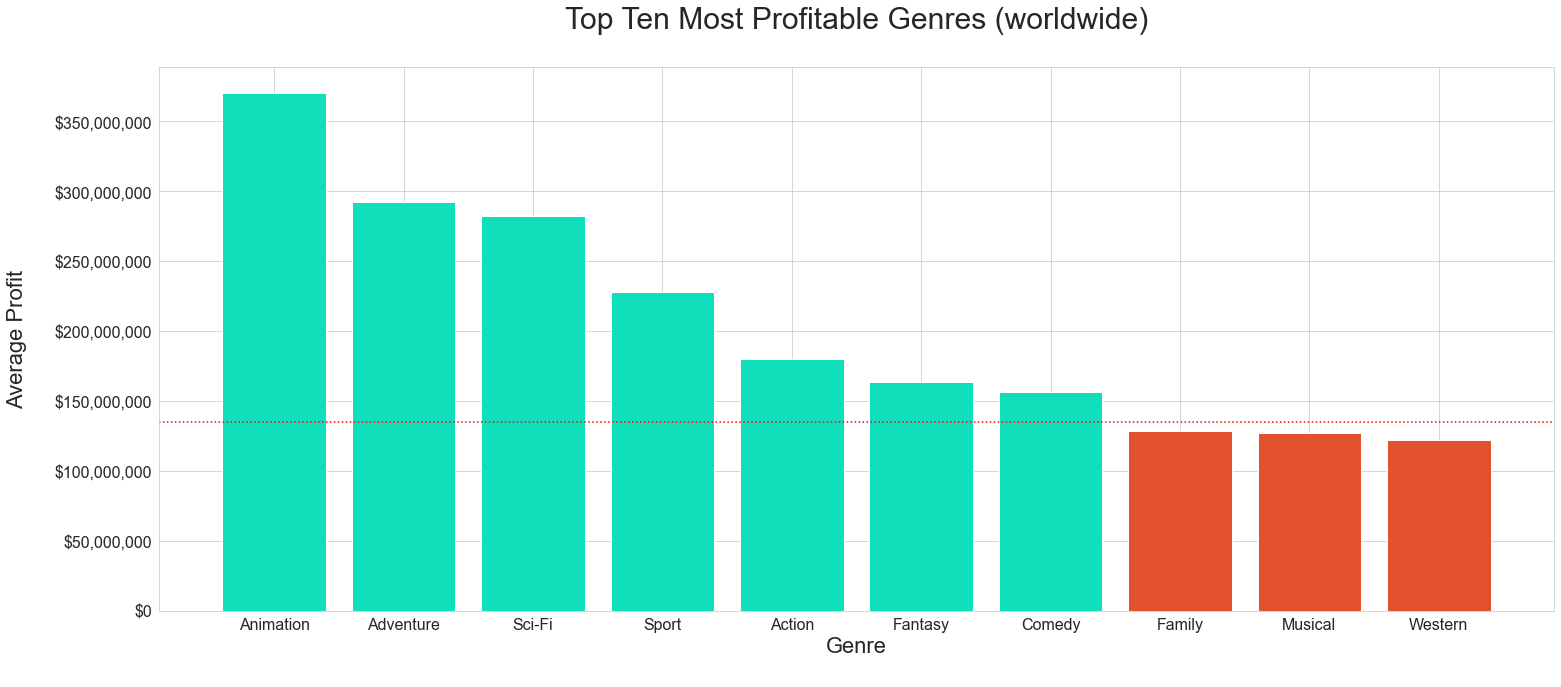

In [73]:
fig, ax = plt.subplots(figsize = (25,10))
x = genre_profit.index
height = genre_profit.values

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.axhline(genre_profit.values.mean(), color = 'red', ls = 'dotted')

colors = ['#10DFBC' if val > 1.5*10**8 else '#E2522F' for val in height]


ax.bar(x[:10], height[:10], color=colors)
ax.set_title('Top Ten Most Profitable Genres (worldwide)\n', fontsize = 30)
ax.set_xlabel('Genre\n', fontsize = 22)
ax.set_ylabel('Average Profit\n', fontsize = 22);

### Studio Data Analysis

Create dataframe with desired columns of studio, movie title, profit, genre, and director.

In [74]:
studios_table = films_df[['studio', 'original_title', 'Profit', 'genres', 'primary_name']]
studios_table

,studio,original_title,Profit,genres,primary_name
0,BV,Toy Story 3,868879522.00000,"Adventure,Animation,Comedy",Lee Unkrich
1,WB,Inception,675524642.00000,"Action,Adventure,Sci-Fi",Christopher Nolan
2,P/DW,Shrek Forever After,591244673.00000,"Adventure,Animation,Comedy",Mike Mitchell
3,Sum.,The Twilight Saga: Eclipse,638102828.00000,"Adventure,Drama,Fantasy",David Slade
4,Par.,Iron Man 2,451156389.00000,"Action,Adventure,Sci-Fi",Jon Favreau
...,...,...,...,...,...
1572,LGF,Kin,-19903179.00000,"Drama,Music",Rachel Lambert
1573,Amazon,Suspiria,-12965385.00000,"Fantasy,Horror,Mystery",Luca Guadagnino
1574,Annapurna,Destroyer,-5318904.00000,"Action,Crime,Drama",Karyn Kusama
1575,VE,Bilal: A New Breed of Hero,-29351401.00000,"Action,Adventure,Animation",Ayman Jamal


### Clean Data
Some of the studios were named differently from the merged dataframes, but are actually the same entity.

In [75]:
studios_table['studio'].replace({'WB (NL)': 'WB'}, inplace = True)

C:\Users\dcv_2\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [76]:
studios_table['studio'].replace({'BV': 'BV (Disney)', 'SPC': 'Sony'}, inplace = True)

In [77]:
studios_table['genres'] = studios_table['genres'].str.split(',')

<ipython-input-77-f398604f63c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studios_table['genres'] = studios_table['genres'].str.split(',')


Here we created 4 seperate visuals to show the top studios performance in the most profitable genres to give Microsoft a concise comparison of potential partnerships.

In [78]:
studio_genre_df = pd.pivot_table(studios_table.explode('genres'), index = 'genres', columns = 'studio', values = 'Profit', aggfunc = 'mean')[['Uni.', 'WB', 'Fox']]


In [79]:
top_genre_per_studio = studio_genre_df.loc[['Animation', 'Adventure', 'Sci-Fi', 'Sport', 'Action']]

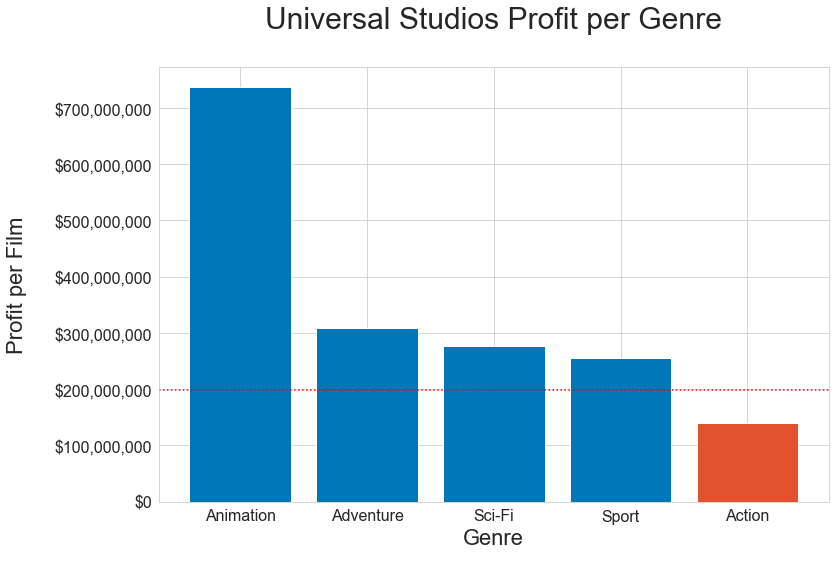

In [80]:
x = top_genre_per_studio.index
height = top_genre_per_studio['Uni.'].values
colors = ['#0077b6' if val > 1.5*10**8 else '#E2522F' for val in height]
fig, ax = plt.subplots(figsize = (12,8))
ax.bar(color=colors, x=x, height=height)

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.xticks(fontsize = 16, rotation = 0)
plt.yticks(fontsize = 16)
plt.axhline(studio_genre_df['Uni.'].mean(), color = 'red', ls = 'dotted')


ax.set_title('Universal Studios Profit per Genre\n', fontsize = 30)
ax.set_xlabel('Genre\n', fontsize = 22)
ax.set_ylabel('Profit per Film\n', fontsize = 22);

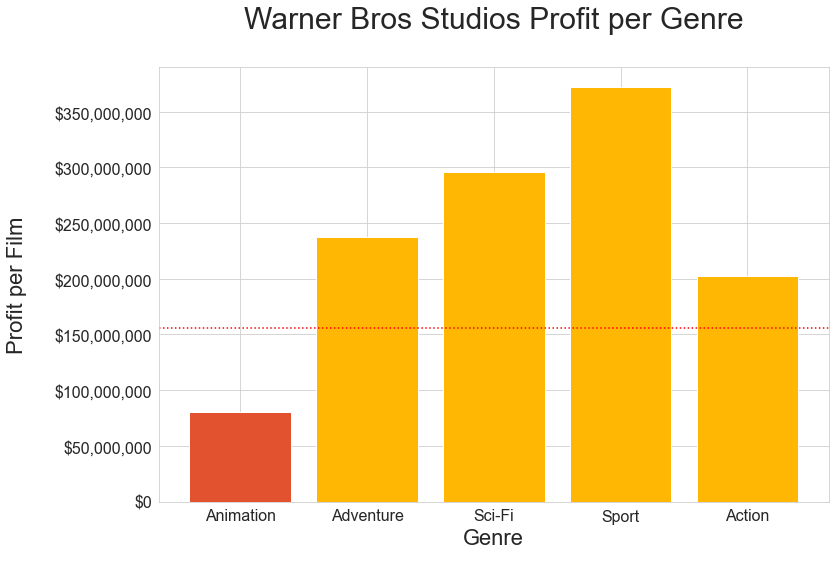

In [81]:
x = top_genre_per_studio.index
height = top_genre_per_studio['WB'].values
colors = ['#E2522F' if val < 2*10**8 else '#ffb703' for val in height]
fig, ax = plt.subplots(figsize = (12,8))
ax.bar(color = colors, x=x, height=height)


ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.xticks(fontsize = 16, rotation = 0)
plt.yticks(fontsize = 16)
plt.axhline(studio_genre_df['WB'].mean(), color = 'red', ls = 'dotted')

ax.set_title('Warner Bros Studios Profit per Genre\n', fontsize = 30)
ax.set_xlabel('Genre\n', fontsize = 22)
ax.set_ylabel('Profit per Film\n', fontsize = 22);

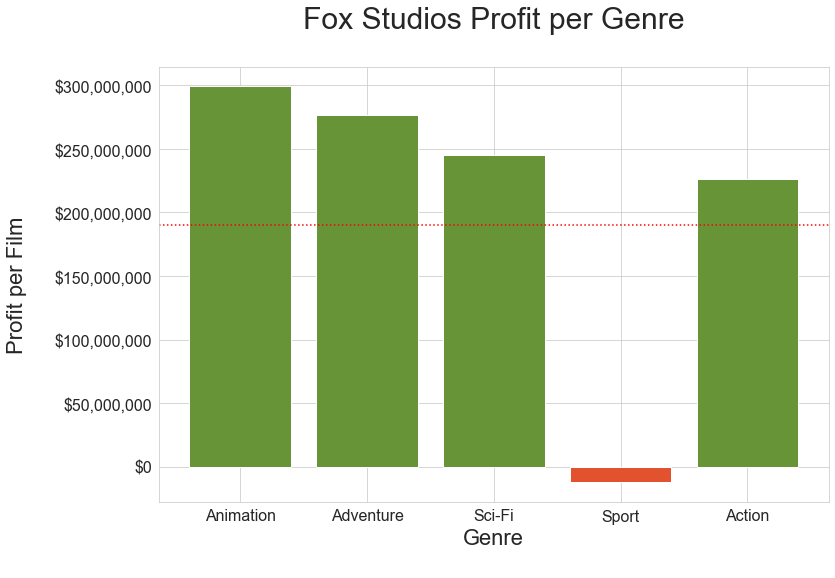

In [82]:
fox_mean = studio_genre_df['Fox'].mean()
x = top_genre_per_studio.index
height = top_genre_per_studio['Fox'].values
colors = ['#E2522F' if val < 1.3*10**8 else '#679436' for val in height]
fig, ax = plt.subplots(figsize = (12,8))
ax.bar(x=x, height=height, color=colors)

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.xticks(fontsize = 16, rotation = 0)
plt.yticks(fontsize = 16)
plt.axhline(fox_mean, color = 'red', ls = 'dotted')

ax.set_title('Fox Studios Profit per Genre\n', fontsize = 30)
ax.set_xlabel('Genre\n', fontsize = 22)
ax.set_ylabel('Profit per Film\n', fontsize = 22);

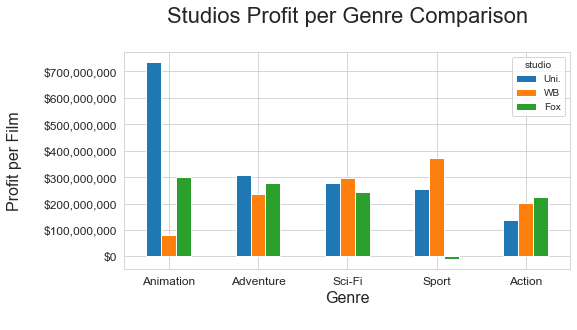

In [83]:
fig, ax = plt.subplots(figsize = (12,8))
studio_average_profit_per_genre_df = studio_genre_df.loc[['Animation', 'Adventure', 'Sci-Fi', 'Sport', 'Action']].plot.bar(figsize = (8,4), ax = ax)

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)

ax.set_title('Studios Profit per Genre Comparison\n', fontsize = 22)
ax.set_xlabel('Genre\n', fontsize = 16)
ax.set_ylabel('Profit per Film\n', fontsize = 16)
plt.savefig('photos/threeStudio3.png', bbox_inches='tight');


# Average Studio Profit

In [84]:
studios_profit = studios_table.groupby('studio')['Profit'].mean().sort_values()[::-1]
studios_profit

studio
BV (Disney)   447822982.29661
P/DW          405980087.30769
GrtIndia      233502914.00000
Fox           175252967.74675
WB            157713701.73869
                    ...      
Amazon        -12965385.00000
OMNI/FSR      -13906275.00000
MNE           -14135452.00000
VE            -29351401.00000
Free          -36109895.00000
Name: Profit, Length: 64, dtype: float64

Here we extract the studios with at least 100 films in the data. This allows us to present partnerships of established, successful studios.

In [85]:
common_studios = studios_table['studio'].value_counts()[:6]
common_studios

Uni.           255
WB             199
Fox            154
BV (Disney)    118
Sony           110
Par.           102
Name: studio, dtype: int64

In [86]:
universal_df = studios_table[studios_table['studio'] == 'Uni.']

In [87]:
warner_df = studios_table[studios_table['studio'] == 'WB']

In [88]:
studio_dfs = []

for studio in common_studios.index:
    print(studio)
    studio_df = studios_table[studios_table['studio'] == studio]
    studio_df.head()
    studio_dfs.append(studio_df)

Uni.
WB
Fox
BV (Disney)
Sony
Par.


In [89]:
top_studios = pd.concat(studio_dfs)

Now we find the average profit from each movie made by each of the top studios.

In [90]:
top_studios_profit = top_studios.groupby('studio')['Profit'].mean().sort_values()[::-1]
top_studios_profit

studio
BV (Disney)   447822982.29661
Fox           175252967.74675
WB            157713701.73869
Uni.          154167726.47843
Sony          146782063.41818
Par.          129353472.11765
Name: Profit, dtype: float64

### Visualization

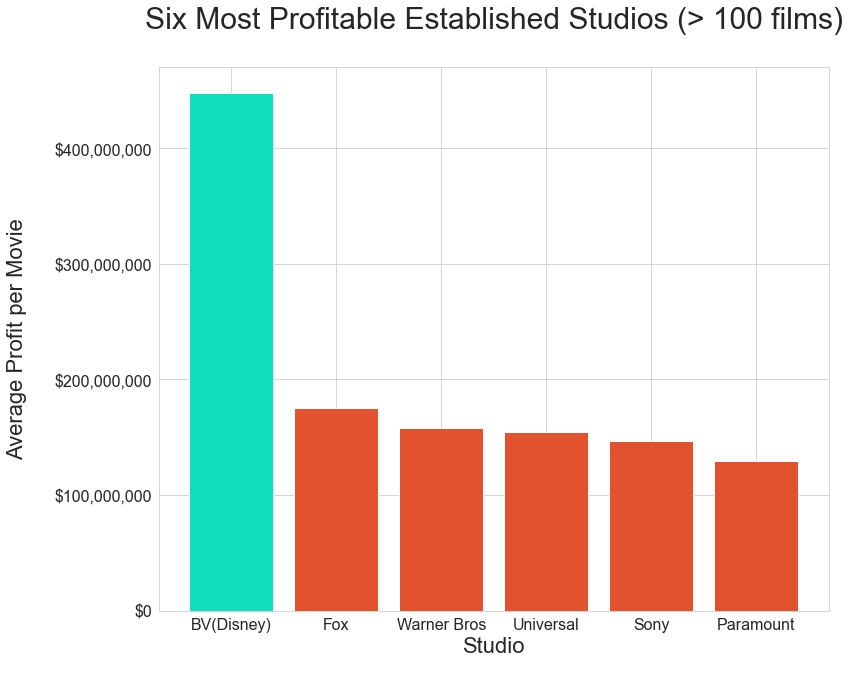

In [91]:
fig, ax = plt.subplots(figsize = (12,10))
x = ['BV(Disney)', 'Fox', 'Warner Bros', 'Universal', 'Sony', 'Paramount']
height = top_studios_profit.values

colors = ['#10DFBC' if val > 2*10**8 else '#E2522F' for val in height]

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

ax.bar(x, height, color=colors)
ax.set_title('Six Most Profitable Established Studios (> 100 films)\n', fontsize = 30)
ax.set_xlabel('Studio\n', fontsize = 22)
ax.set_ylabel('Average Profit per Movie\n', fontsize = 22);

# Conclusion

These are our final recomendations for Microsoft:
- Studios to work/aquire
    - Warner Bros
    - Fox
    - Universal
- Genres to focus on
    - Adventure
    - Sci-Fi
    - Action
- Directors to hire
    - Tim Miller
    - Joss Whedon
    - Joe Russo